 # Rain in Australia Classification

 ## 1. Data upload and first study

In [199]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, roc_auc_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn

In [201]:
# Data upload
df = pd.read_csv('/Users/macbook/Desktop/Yandex Mashine Learning/Kaggle/Rain in Australia/weatherAUS.csv')

In [203]:
# First study
display(df.info())
display(df.head(10))
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

None

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [204]:
# Transform columns to lowercase

df.columns = df.columns.str.lower()
print(df.columns)

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')


 #### We have a lot of missing values therefore we will study a data in detailming

 ## 2. Analysis of data

 ### Explore target

In [223]:
print(df.raintomorrow.isnull().sum())
print(df.raintomorrow.value_counts())

0
raintomorrow
0    110316
1     31877
Name: count, dtype: int64


In [225]:
# Delete NaN values and replace No by 0 and Yes by 1

df = df[df['raintomorrow'].notna()]

print(df.raintomorrow.isnull().sum())
print()

df['raintomorrow'] = df['raintomorrow'].replace({'Yes': 1, 'No': 0})
print(df['raintomorrow'].head(5))

0

0    0
1    0
2    0
3    0
4    0
Name: raintomorrow, dtype: int64


 ### Explore column raintoday

In [228]:
print(df.raintoday.isnull().sum())
print(df.raintoday.value_counts())

1406
raintoday
No     109332
Yes     31455
Name: count, dtype: int64


In [230]:
# Delete NaN values and replace No by 0 and Yes by 1

df = df[df['raintoday'].notna()]

print(df.raintoday.isnull().sum())
print()

df['raintoday'] = df['raintoday'].replace({'Yes': 1, 'No': 0})
print(df['raintoday'].head(5))

0

0    0
1    0
2    0
3    0
4    0
Name: raintoday, dtype: int64


/var/folders/b4/mc0v_4c562xfny9p49bm920h0000gn/T/ipykernel_7294/3214504913.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['raintoday'] = df['raintoday'].replace({'Yes': 1, 'No': 0})


 ### Explore column windgustdir

In [233]:
print(df.windgustdir.isnull().sum())
print()
print(df.windgustdir.value_counts())

9163

windgustdir
W      9696
SE     9241
E      8985
N      8941
SSE    8905
S      8859
WSW    8802
SW     8702
SSW    8541
WNW    7960
NW     7939
ENE    7924
ESE    7244
NE     7002
NNW    6511
NNE    6372
Name: count, dtype: int64


In [235]:
# Replace Nan by A (absent)

df['windgustdir'] = df['windgustdir'].fillna('A')

print(df.windgustdir.isnull().sum())

0


 ### Explore column windgustspeed

In [238]:
print(df.windgustspeed.isnull().sum())
print()
print(df.windgustspeed.value_counts().sort_index())

9105

windgustspeed
6.0        1
7.0       18
9.0       91
11.0     190
13.0     527
        ... 
122.0      2
124.0      2
126.0      2
130.0      1
135.0      2
Name: count, Length: 67, dtype: int64


In [240]:
# Replace Nan by 0 (windless)

df['windgustdir'] = df['windgustdir'].fillna(0)

print(df.windgustdir.isnull().sum())

0


 ### Explore column winddir9am

In [243]:
print(df.winddir9am.isnull().sum())
print()
print(df.winddir9am.value_counts())

9660

winddir9am
N      11266
SE      9116
E       8977
SSE     8901
NW      8471
S       8424
W       8207
SW      8160
NNE     7877
NNW     7782
ENE     7668
ESE     7518
NE      7477
SSW     7397
WNW     7100
WSW     6786
Name: count, dtype: int64


In [245]:
# Replace Nan by A (absent)

df['winddir9am'] = df['winddir9am'].fillna('A')

print(df.winddir9am.isnull().sum())

0


 ### Explore column winddir3pm

In [248]:
print(df.winddir3pm.isnull().sum())
print()
print(df.winddir3pm.value_counts())

3670

winddir3pm
SE     10578
W       9810
S       9488
WSW     9231
SW      9104
SSE     9038
N       8593
WNW     8564
NW      8394
ESE     8311
E       8272
NE      8107
SSW     7945
NNW     7664
ENE     7645
NNE     6373
Name: count, dtype: int64


In [250]:
# Replace Nan by A (absent)

df['winddir3pm'] = df['winddir3pm'].fillna('A')

print(df.winddir3pm.isnull().sum())

0


 ### Explore column windspeed3pm

In [253]:
print(df.windspeed3pm.isnull().sum())
print()
print(df.windspeed3pm.value_counts().sort_index())

2531

windspeed3pm
0.0      1088
2.0       999
4.0      2198
6.0      3704
7.0      5763
9.0      9493
11.0     9760
13.0    12215
15.0    11196
17.0    12209
19.0    10952
20.0    11385
22.0     8330
24.0     8760
26.0     6307
28.0     6330
30.0     4407
31.0     3857
33.0     2422
35.0     2069
37.0     1327
39.0     1065
41.0      628
43.0      538
44.0      333
46.0      276
48.0      169
50.0      175
52.0       84
54.0       57
56.0       53
57.0       26
59.0       20
61.0       18
63.0       13
65.0       17
67.0        1
69.0        3
72.0        2
74.0        1
76.0        2
78.0        1
83.0        2
87.0        1
Name: count, dtype: int64


In [255]:
# Delete NaN values 

df = df[df['windspeed3pm'].notna()]

print(df.windspeed3pm.isnull().sum())

0


 ### Explore column windspeed9am

In [258]:
print(df.windspeed9am.isnull().sum())
print()
print(df.windspeed9am.value_counts().sort_index())

267

windspeed9am
0.0      8184
2.0      4448
4.0      6119
6.0      8859
7.0     10418
9.0     12976
11.0    11389
13.0    12665
15.0    10249
17.0    10466
19.0     8375
20.0     7812
22.0     5464
24.0     5244
26.0     3624
28.0     3387
30.0     2221
31.0     1909
33.0     1065
35.0      907
37.0      540
39.0      416
41.0      307
43.0      255
44.0      187
46.0      150
48.0       83
50.0       80
52.0       62
54.0       36
56.0       34
57.0       19
59.0        5
61.0        9
63.0        8
65.0        5
67.0        3
69.0        2
72.0        1
74.0        3
83.0        1
87.0        2
Name: count, dtype: int64


In [260]:
# Delete NaN values 

df = df[df['windspeed9am'].notna()]

print(df.windspeed9am.isnull().sum())

0


 ### Explore column winddir3pm

In [263]:
print(df.windspeed9am.isnull().sum())
print()
print(df.windspeed9am.value_counts().sort_index())

0

windspeed9am
0.0      8184
2.0      4448
4.0      6119
6.0      8859
7.0     10418
9.0     12976
11.0    11389
13.0    12665
15.0    10249
17.0    10466
19.0     8375
20.0     7812
22.0     5464
24.0     5244
26.0     3624
28.0     3387
30.0     2221
31.0     1909
33.0     1065
35.0      907
37.0      540
39.0      416
41.0      307
43.0      255
44.0      187
46.0      150
48.0       83
50.0       80
52.0       62
54.0       36
56.0       34
57.0       19
59.0        5
61.0        9
63.0        8
65.0        5
67.0        3
69.0        2
72.0        1
74.0        3
83.0        1
87.0        2
Name: count, dtype: int64


 ### Explore column humidity9am

In [266]:
print(df.humidity9am.isnull().sum())
print()
print(df.humidity9am.value_counts().sort_index())

1191

humidity9am
0.0         1
1.0         5
2.0         8
3.0        10
4.0        20
         ... 
96.0     1527
97.0     1706
98.0     2009
99.0     3283
100.0    2789
Name: count, Length: 101, dtype: int64


In [268]:
# Delete NaN values 

df = df[df['humidity9am'].notna()]

print(df.humidity9am.isnull().sum())

0


 ### Explore column humidity3pm

In [271]:
print(df.humidity3pm.isnull().sum())
print()
print(df.humidity3pm.value_counts().sort_index())

883

humidity3pm
0.0        4
1.0       23
2.0       35
3.0       63
4.0      112
        ... 
96.0     437
97.0     374
98.0     561
99.0     412
100.0    367
Name: count, Length: 101, dtype: int64


In [273]:
# Delete NaN values 

df = df[df['humidity3pm'].notna()]

print(df.humidity3pm.isnull().sum())

0


 ### Explore column pressure9am

In [276]:
print(df.pressure9am.isnull().sum())
print()
print(df.pressure9am.value_counts().sort_index())

11762

pressure9am
980.5     1
982.0     1
982.2     1
982.3     1
982.9     2
         ..
1040.4    3
1040.5    1
1040.6    2
1040.9    1
1041.0    1
Name: count, Length: 545, dtype: int64


In [278]:
# Delete NaN values 

df = df[df['pressure9am'].notna()]

print(df.pressure9am.isnull().sum())

0


 ### Explore column pressure3pm

In [281]:
print(df.pressure3pm.isnull().sum())
print()
print(df.pressure3pm.value_counts().sort_index())

48

pressure3pm
977.1     1
978.2     1
979.0     1
980.2     2
981.2     1
         ..
1038.2    1
1038.4    1
1038.5    1
1038.9    1
1039.6    1
Name: count, Length: 548, dtype: int64


In [283]:
# Delete NaN values 

df = df[df['pressure3pm'].notna()]

print(df.pressure3pm.isnull().sum())

0


 ### Explore column cloud9am

In [286]:
print(df.cloud9am.isnull().sum())
print()
print(df.cloud9am.value_counts().sort_index())

41709

cloud9am
0.0     7691
1.0    14670
2.0     6084
3.0     5590
4.0     4072
5.0     5133
6.0     7348
7.0    18857
8.0    12949
9.0        2
Name: count, dtype: int64


In [288]:
# Delete NaN values 

df = df[df['cloud9am'].notna()]

print(df.cloud9am.isnull().sum())

0


 ### Explore column cloud3pm

In [291]:
print(df.cloud3pm.isnull().sum())
print()
print(df.cloud3pm.value_counts().sort_index())

4933

cloud3pm
0.0     4620
1.0    13248
2.0     6472
3.0     6290
4.0     4718
5.0     6184
6.0     8194
7.0    17199
8.0    10537
9.0        1
Name: count, dtype: int64


In [293]:
# Delete NaN values 

df = df[df['cloud3pm'].notna()]

print(df.cloud3pm.isnull().sum())

0


 ### Explore column windgustspeed

In [296]:
print(df.windgustspeed.isnull().sum())
print()
print(df.windgustspeed.value_counts().sort_index())

4014

windgustspeed
7.0        1
9.0        3
11.0      35
13.0     161
15.0     323
        ... 
117.0      2
120.0      1
122.0      2
124.0      1
126.0      1
Name: count, Length: 64, dtype: int64


In [298]:
# Replace Nan by 0 (gust is absent)

df['windgustspeed'] = df['windgustspeed'].fillna(0)

print(df.windgustspeed.isnull().sum())

0


 ### Explore column sunshine

In [301]:
print(df.sunshine.isnull().sum())
print()
print(df.sunshine.value_counts().sort_index())

13626

sunshine
0.0     2011
0.1      460
0.2      436
0.3      360
0.4      266
        ... 
14.0      10
14.1       3
14.2       2
14.3       3
14.5       1
Name: count, Length: 145, dtype: int64


In [302]:
# Delete NaN values 

df = df[df['sunshine'].notna()]

print(df.sunshine.isnull().sum())

0


 ### Explore column evaporation

In [306]:
print(df.evaporation.isnull().sum())
print()
print(df.evaporation.value_counts().sort_index())

1988

evaporation
0.0     163
0.1       1
0.2     371
0.3       2
0.4     515
       ... 
63.0      1
65.4      1
70.0      1
72.2      1
81.2      1
Name: count, Length: 259, dtype: int64


In [307]:
# Delete NaN values 

df = df[df['evaporation'].notna()]

print(df.evaporation.isnull().sum())

0


 ### Explore column mintemp

In [311]:
print(df.mintemp.isnull().sum())
print()
print(df.mintemp.value_counts().sort_index())

39

mintemp
-6.7     1
-5.8     2
-5.3     2
-5.2     2
-5.0     2
        ..
 29.7    4
 29.8    1
 30.3    1
 30.5    1
 31.4    1
Name: count, Length: 351, dtype: int64


In [313]:
# Delete NaN values 

df = df[df['mintemp'].notna()]

print(df.mintemp.isnull().sum())

0


 ### Explore column maxtemp

In [316]:
print(df.maxtemp.isnull().sum())
print()
print(df.maxtemp.value_counts().sort_index())

19

maxtemp
4.1     1
6.3     1
7.0     1
7.1     1
7.2     1
       ..
46.4    2
46.7    2
46.8    2
47.3    1
48.1    1
Name: count, Length: 395, dtype: int64


In [318]:
# Delete NaN values 

df = df[df['maxtemp'].notna()]

print(df.maxtemp.isnull().sum())

0


In [319]:
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61791 entries, 0 to 61790
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           61791 non-null  object 
 1   location       61791 non-null  object 
 2   mintemp        61791 non-null  float64
 3   maxtemp        61791 non-null  float64
 4   rainfall       61791 non-null  float64
 5   evaporation    61791 non-null  float64
 6   sunshine       61791 non-null  float64
 7   windgustdir    61791 non-null  object 
 8   windgustspeed  61791 non-null  float64
 9   winddir9am     61791 non-null  object 
 10  winddir3pm     61791 non-null  object 
 11  windspeed9am   61791 non-null  float64
 12  windspeed3pm   61791 non-null  float64
 13  humidity9am    61791 non-null  float64
 14  humidity3pm    61791 non-null  float64
 15  pressure9am    61791 non-null  float64
 16  pressure3pm    61791 non-null  float64
 17  cloud9am       61791 non-null  float64
 18  cloud3

In [320]:
# Convert column date to two columns month and day
df['date'] = pd.to_datetime(df['date'])

# Create a new columns
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Delete jriginal column "date"
df.drop(columns=['date'], inplace=True)

df.head(5)

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,...,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,month,day
0,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0,1,1
1,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0,1,2
2,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0,1,4
3,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0,1,5
4,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0,1,6


In [324]:
df.raintoday.value_counts()

raintoday
0    48000
1    13791
Name: count, dtype: int64

 #### PCA

In [327]:
def feature_importance_with_lin(df, target_variable):
    X = df.drop([target_variable], axis=1)
    y = df[target_variable]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_scaled, y)

    importance = model.coef_

    if importance.shape[0] > 1:
        importance = importance.mean(axis=0)

    # Преобразуйте в одномерный массив, если это необходимо
    importance = importance.flatten()

    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance
    })

    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    return importance_df


def feature_importance_with_random_forest(df, target_variable):
    # Remove the target variable 
    X = df.drop([target_variable], axis=1)
    y = df[target_variable]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a random forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)

    # Get feature importances
    importance = model.feature_importances_

    # Create a DataFrame to store feature names and their corresponding importance scores
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance
    })

    # Sort the DataFrame by importance in descending order
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    return importance_df


def feature_importance_pca(df, columns_to_drop):
    # Drop specified columns
    X = df.drop(columns=columns_to_drop)

    # Initialize the StandardScaler to standardize the features
    scaler = StandardScaler()

    # Fit the scaler to the data and transform it to standardized values
    scaled_data = scaler.fit_transform(X)

    # Initialize PCA (Principal Component Analysis)
    pca = PCA()

    # Fit PCA on the scaled data to compute principal components
    pca.fit(scaled_data)

    # Get the explained variance ratio for each principal component
    explained_variance = pca.explained_variance_ratio_

    # Get the components (loadings) of PCA
    components = pca.components_

    # Calculate feature importance as the sum of absolute values of components multiplied by explained variance
    importance = abs(components).sum(axis=0) * explained_variance

    # Create a DataFrame to hold feature names and their corresponding importance scores
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance
    })

    return importance_df

In [337]:
df_pca = pd.get_dummies(df, drop_first=False)

importance_lin = feature_importance_with_lin(df_pca, 'raintomorrow')
importance_lin.head(15)

,Feature,Importance
9,humidity3pm,1.132405
5,windgustspeed,0.845728
10,pressure9am,0.826228
46,windgustdir_A,0.501722
13,cloud3pm,0.344007
16,raintoday,0.187878
35,location_Perth,0.154566
1,maxtemp,0.142336
21,location_Brisbane,0.138514
36,location_PerthAirport,0.088885


In [338]:
importance_forest = feature_importance_with_random_forest(df_pca, 'raintomorrow')
importance_forest.head(15)

,Feature,Importance
9,humidity3pm,0.112770
4,sunshine,0.095461
11,pressure3pm,0.056578
13,cloud3pm,0.053188
10,pressure9am,0.050978
2,rainfall,0.044279
8,humidity9am,0.042539
5,windgustspeed,0.042166
15,temp3pm,0.037603
0,mintemp,0.035682


In [339]:
importance_pca = feature_importance_pca(df_pca, ['raintomorrow'])
importance_pca.head(15)

,Feature,Importance
0,mintemp,0.294308
1,maxtemp,0.177250
2,rainfall,0.184163
3,evaporation,0.149289
4,sunshine,0.126567
5,windgustspeed,0.099157
6,windspeed9am,0.125324
7,windspeed3pm,0.123251
8,humidity9am,0.104897
9,humidity3pm,0.092325


  #### Build histogram for every column

In [342]:
# Building histogram
plt.figure(figsize=(100, 100)) # size's matrix of histogram
df_describe = df[['location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow', 'month', 'day']] # choice all features
num_cols = 3 # Amount of columns
num_rows = 8 # Amount of ranges
total_plots = num_cols * num_rows # Size of matrix

def count_bin(col): # Function for a return of amount of bins
    return len(df_describe[col].unique()) if len(df_describe[col].unique())<10 else 15

# Using cycle we create a histogram of distribution for every column
for i, col in enumerate(df_describe.columns):
    plt.rcParams.update({'font.size': 50})  # Setting the size of type for title 
    plt.rcParams.update({'axes.labelsize': 50})  # Setting the size of type for axis 
    plt.subplot(num_rows, num_cols, i+1) # Choice histogram for "i" in matrix
    plt.hist(df_describe[col], bins=count_bin(col)) # Building histogram for every column
    plt.title(col) # Assignment title for every column
    plt.xlabel('Значение')
    plt.ylabel('Частота')

plt.tight_layout() # Starting the function for automatic regulation of elemnts
plt.show()

 #### Build box-plots for every numerical columns

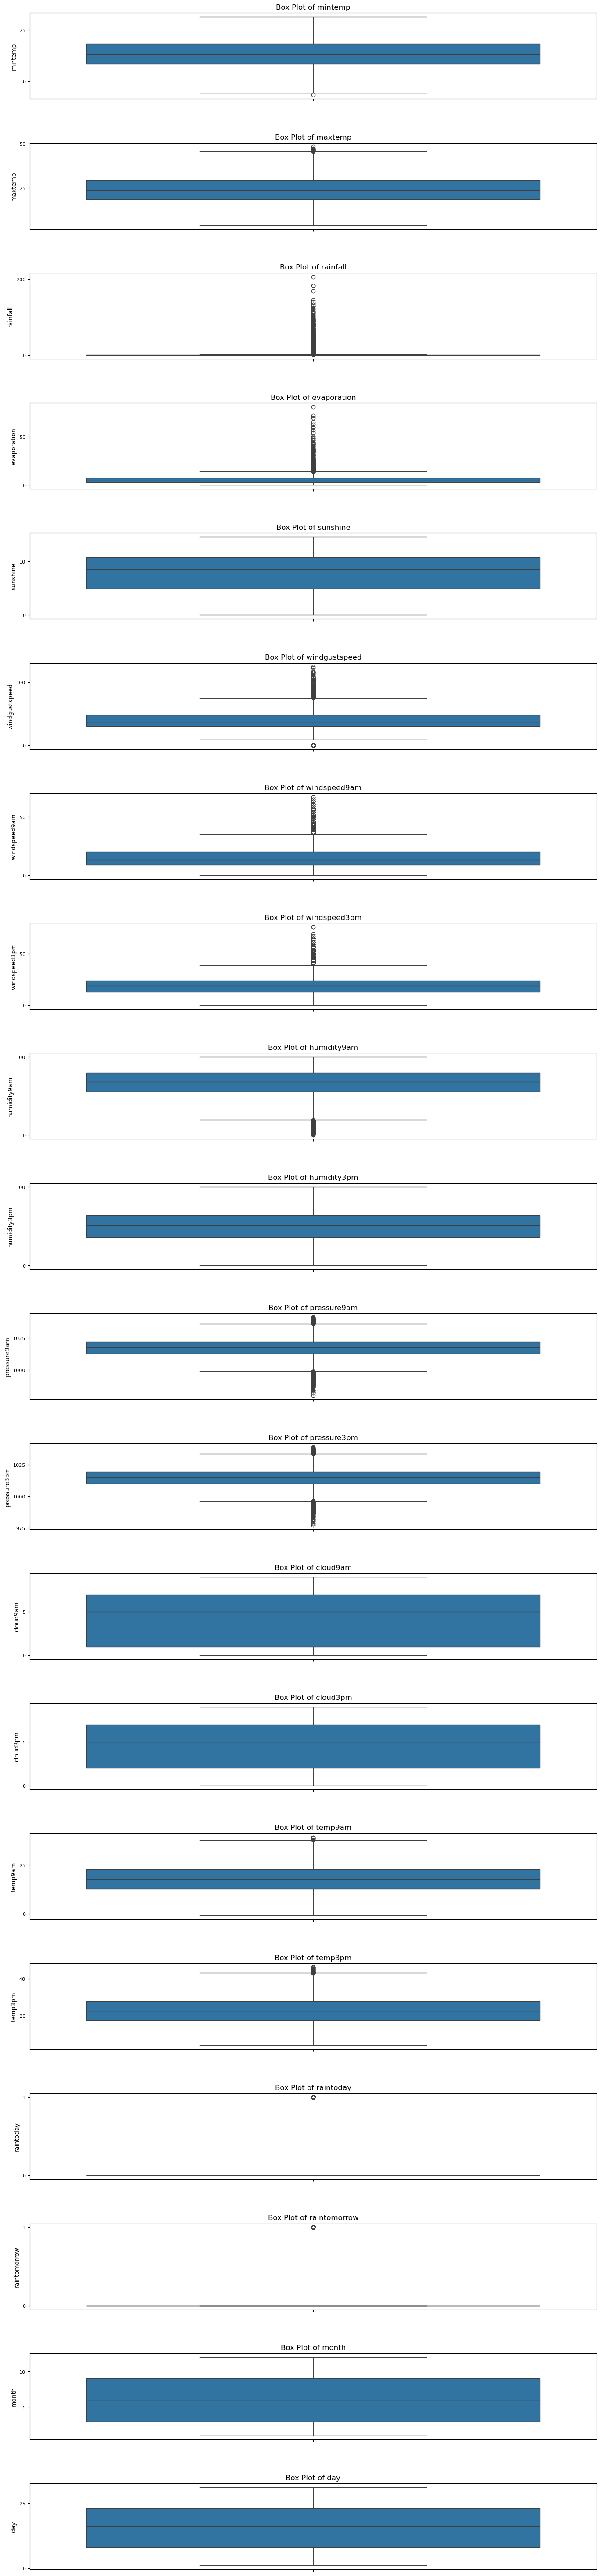

In [344]:
# Создание боксплотов для каждой числовой характеристики
numerical_features = df.select_dtypes(include=['number'])

# Определяем размер фигуры один раз
plt.figure(figsize=(15, len(numerical_features.columns) * 3))

# Создаем подграфики для каждого числового признака
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features.columns), 1, i + 1)  # Создаем подграфик
    sns.boxplot(data=df, y=feature)
    plt.title(f'Box Plot of {feature}', fontsize=12)  # Размер шрифта заголовка
    plt.ylabel(feature, fontsize=10)  # Размер шрифта метки оси Y
    plt.xlabel('')  # Убираем метку оси X, если она не нужна
    
    # Увеличиваем размер шрифта меток на осях
    plt.xticks(fontsize=8)  # Размер шрифта меток на оси X
    plt.yticks(fontsize=8)  # Размер шрифта меток на оси Y

plt.tight_layout()  # Автоматически подгоняет подграфики
plt.show()

In [345]:
# Explore column rainfall
df.rainfall.describe()

count    61791.00000
mean         2.13469
std          6.94253
min          0.00000
25%          0.00000
50%          0.00000
75%          0.80000
max        206.20000
Name: rainfall, dtype: float64

In [346]:
# Explore column evaporation
df.evaporation.describe()

count    61791.000000
mean         5.381857
std          3.644182
min          0.000000
25%          2.800000
50%          4.800000
75%          7.400000
max         81.200000
Name: evaporation, dtype: float64

In [347]:
# Explore column windgustspeed
df.windgustspeed.describe()

count    61791.000000
mean        38.129242
std         16.156778
min          0.000000
25%         30.000000
50%         37.000000
75%         48.000000
max        124.000000
Name: windgustspeed, dtype: float64

 #### Build a matrix of dependences for targetm

In [349]:
new_order = ['location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation', 
             'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 
             'winddir3pm', 'windspeed9am', 'windspeed3pm', 
             'humidity9am', 'humidity3pm', 'pressure9am', 
             'pressure3pm', 'cloud9am', 'cloud3pm', 
             'temp9am', 'temp3pm', 'raintoday', 
             'month', 'day', 'raintomorrow']

df = df.reindex(columns=new_order)

<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
/var/folders/b4/mc0v_4c562xfny9p49bm920h0000gn/T/ipykernel_7294/1658756089.py:9: SyntaxWarning: invalid escape sequence '\p'
  title='Корреляция $\phi_k$',


interval columns not set, guessing: ['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine', 'windgustspeed', 'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday', 'month', 'day', 'raintomorrow']


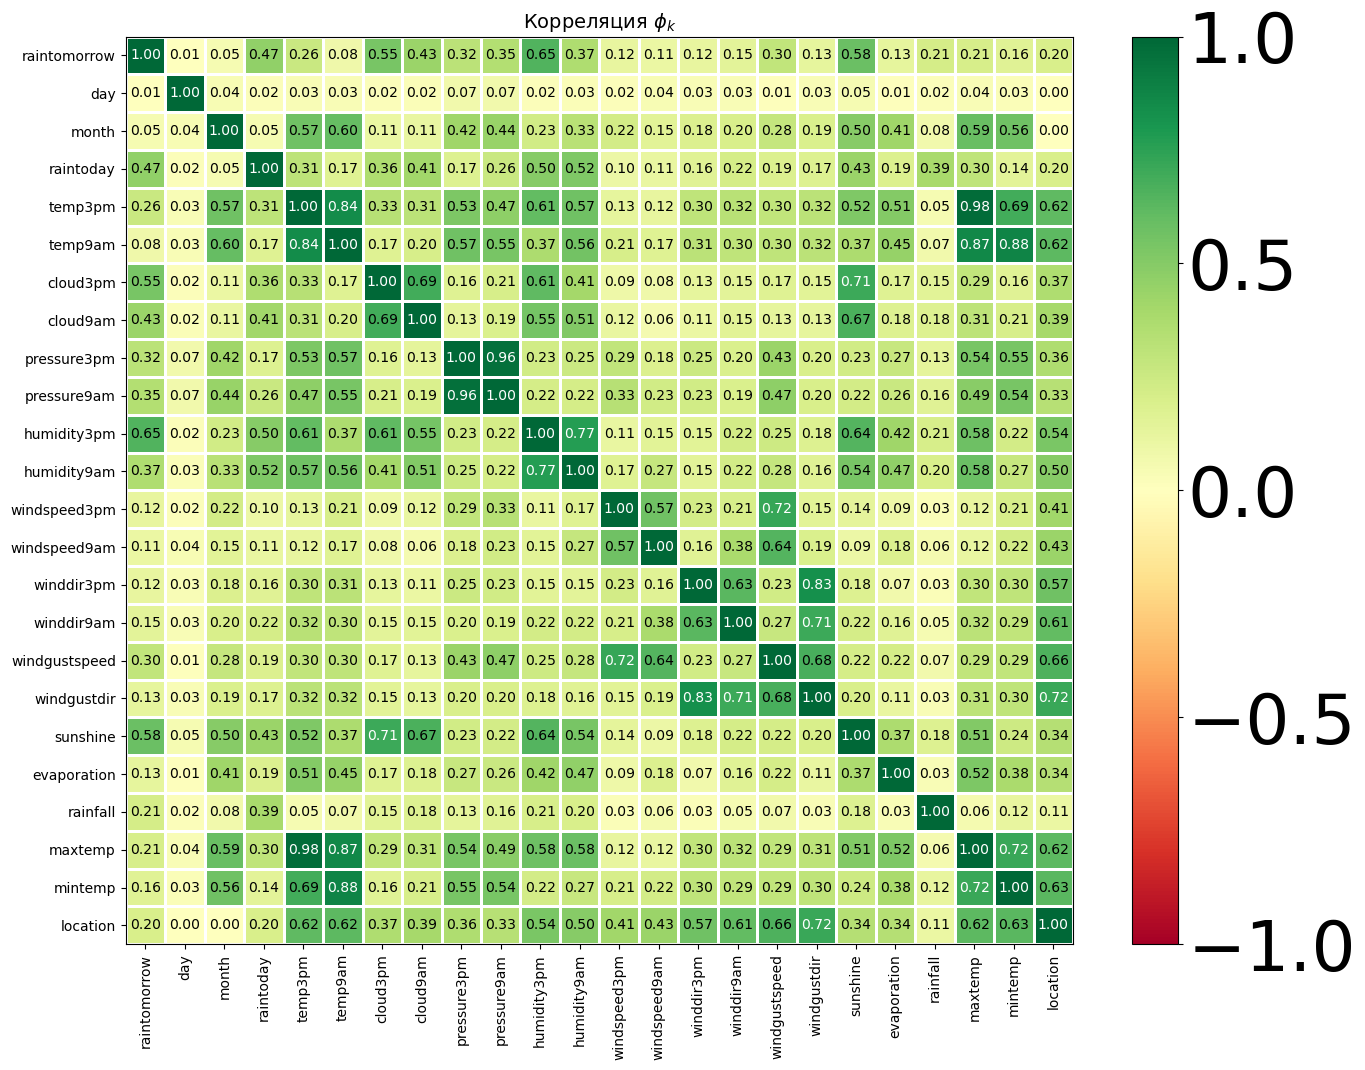

In [350]:
# Receive a correlation
phik_corr = df.phik_matrix()

# Build   
plot_correlation_matrix(
    phik_corr.values,
    x_labels=phik_corr.columns,
    y_labels=phik_corr.index,
    title='Корреляция $\phi_k$',
    identity_layout=True,
    figsize=(15, 12 )
)

 #### Droppping outlier data

In [354]:
for_delete_ejection = ['maxtemp', 'rainfall','evaporation','windgustspeed', 'windspeed9am', 'windspeed3pm',
                      'humidity9am', 'pressure9am', 'pressure3pm', 'temp9am', 'temp3pm']

In [356]:
for column in for_delete_ejection:
    Q1 = df[column].quantile(0.25)

    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR

    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

 ## Data preparation

 ### Prepare numerical and categorial columns

In [85]:
df = pd.get_dummies(df, drop_first=True)

# Select a features and target
features = df.drop(['raintomorrow'], axis=1)
target = df['raintomorrow']

smote = SMOTE(random_state=42)

X, y = smote.fit_resample(features, target)


# Part a data for train and test
features_train, features_test, target_train, target_test = train_test_split(X, y, random_state=12345, test_size=0.2)

scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)


# Check a target in train data and test data
print('Train data', target_train.value_counts())
print()
print('Test data', target_test.value_counts())

Train data raintomorrow
1    29480
0    29433
Name: count, dtype: int64

Test data raintomorrow
0    7388
1    7341
Name: count, dtype: int64


 #### Write the function for metrics

In [87]:
def metrics(predictions, target):
    accuracy = accuracy_score(target, predictions)
    precision = precision_score(target, predictions)
    recall = recall_score(target, predictions)
    f1 = f1_score(target, predictions)
    roc = roc_auc_score(target, predictions)
    return {'accuracy': accuracy, 'precision': precision, 'recal': recall, 'f1': f1, 'roc': roc}

 #### Train LogisticRegression model 

In [89]:
max_iter = [50, 100, 150]                      
solvers = ['liblinear', 'newton-cg', 'lbfgs'] 
best_result = 0
logistic_regres, best_iter, best_solver = None, None, None

for iter in max_iter:
    for solver in solvers:
        model = LogisticRegression(class_weight='balanced', random_state=12345, max_iter=iter, solver=solver)
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions)
        if result > best_result:
            logistic_regres = metrics(predictions, target_test)
            best_iter = iter
            best_solver = solver


print(f'The best parameters: max_iter={best_iter}, solver={best_solver}')
print('Test data', logistic_regres)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The best parameters: max_iter=150, solver=lbfgs
Test data {'accuracy': 0.9261321203068776, 'precision': 0.958902098928519, 'recal': 0.8899332516005993, 'f1': 0.9231312703122793, 'roc': 0.9260169777223353}


 #### Train DecisionTree Model

In [91]:
best_result = 0
best_depth = 0
dec_tree = None
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state = 12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    result = recall_score(target_test, predictions)
    #print(depth, result)
    if best_result < result:
        dec_tree = metrics(predictions, target_test)
        best_depth = depth
        best_result = result

print(f'The best parameters: depth={best_depth}')
print('Test data', dec_tree)

The best parameters: depth=5
Test data {'accuracy': 0.7730327924502681, 'precision': 0.7342944210032818, 'recal': 0.8534259637651546, 'f1': 0.7893907893907894, 'roc': 0.7732885097656308}


 #### Train Randomforest Model

In [93]:
best_result, best_depth, best_est = 0, 0, 0
rand_forest = None
for est in range(10, 100, 10):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est, class_weight='balanced')
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions)
        if best_result < result:
            rand_forest = metrics(predictions, target_test)
            best_depth = depth
            best_est = est
            best_result = result

print(f'The best parameters: depth={best_depth}, est={best_est}')
print('Test data', rand_forest)

The best parameters: depth=9, est=80
Test data {'accuracy': 0.8441849412723199, 'precision': 0.8220576972172581, 'recal': 0.877264677836807, 'f1': 0.8487644151565075, 'roc': 0.8442901624159671}


 #### Train KNeighborsClassifier model

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

best_result, best_n_neighbors, best_metric = 0, 0, ''
knn = None

# Перебор параметров
for n_neighbors in range(1, 21):  # Перебор от 1 до 20 соседей
    for metric in ['euclidean', 'manhattan', 'minkowski']:  # Разные метрики
        model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions)
        
        if best_result < result:
            knn = metrics(predictions, target_test)
            best_n_neighbors = n_neighbors
            best_metric = metric
            best_result = result

print(f'The best parameters: n_neighbors={best_n_neighbors}, metric={best_metric}')
print('Test data metrics:', knn)

The best parameters: n_neighbors=1, metric=manhattan
Test data metrics: {'accuracy': 0.9266752664810918, 'precision': 0.9122876333465033, 'recal': 0.9436044135676338, 'f1': 0.9276817999196465, 'roc': 0.9267291152840877}


 #### Train XGBlassifier

In [97]:
from xgboost import XGBClassifier

best_result, best_depth, best_est, best_learning_rate = 0, 0, 0, 0

xgb = None
pos_weight = sum(target_train == 0) / sum(target_train == 1)

for est in range(10, 110, 10):
    for depth in range(1, 10):
        for learning_rate in [0.01, 0.1, 0.2]:  
            model = XGBClassifier(
                random_state=12345,
                max_depth=depth,
                n_estimators=est,
                learning_rate=learning_rate,
                scale_pos_weight=pos_weight
            )
            model.fit(features_train, target_train)
            predictions = model.predict(features_test)
            result = recall_score(target_test, predictions)
            
            if best_result < result:
                xgb = metrics(predictions, target_test)
                best_depth = depth
                best_est = est
                best_learning_rate = learning_rate
                best_result = result

print(f'The best parameters: depth={best_depth}, est={best_est}, learning_rate={best_learning_rate}')
print('Best F1 Score:', xgb)

The best parameters: depth=9, est=100, learning_rate=0.2
Best F1 Score: {'accuracy': 0.931835155136126, 'precision': 0.9468340149485263, 'recal': 0.9145892930118512, 'f1': 0.9304323725055432, 'roc': 0.931780298915238}


 #### Train LGBMregressor Model

In [99]:
best_est = 0
best_result = 0
best_depth = 0
lgbm = None
for est in range(10, 100, 10):
    for depth in range(1, 10):
        model = LGBMClassifier(random_state=12345, max_depth=depth, num_leaves=31, n_estimators=est, learning_rate=0.2, boosting_type='gbdt') # Инициализируем модель с заданным количеством деревьев
        model.fit(features_train, target_train)
        predicted = model.predict(features_test)
        result = recall_score(target_test, predictions)
        #print(est, depth, result)
        if result > best_result:
            lgbm = metrics(predictions, target_test)
            best_est = est
            best_depth = depth
            best_result = result

print(f'The best parameters: depth={best_depth}, est={best_est}')
print('Test data', lgbm)

[LightGBM] [Info] Number of positive: 29480, number of negative: 29433
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4342
[LightGBM] [Info] Number of data points in the train set: 58913, number of used features: 92
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500399 -> initscore=0.001596
[LightGBM] [Info] Start training from score 0.001596
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

 #### Train Catboost Model

In [101]:
best_est = 0
best_result = 0
best_depth = 0
cat_boost = None
for est in range(10, 100, 10):
    for depth in range(1, 10):
        model = CatBoostClassifier(random_state=12345, max_depth=depth, n_estimators=est, learning_rate=0.2) # Инициализируем модель с заданным количеством деревьев
        model.fit(features_train, target_train)
        predicted = model.predict(features_test)
        result = recall_score(target_test, predictions)
        if result > best_result:
            best_result = result
            best_est = est
            best_depth = depth
            cat_boost = metrics(predictions, target_test)

print(f'The best parameters: depth={best_depth}, est={best_est}')
print('Test data', cat_boost)

0:	learn: 0.6473955	total: 62.3ms	remaining: 561ms
1:	learn: 0.6141175	total: 65.8ms	remaining: 263ms
2:	learn: 0.5896243	total: 69.4ms	remaining: 162ms
3:	learn: 0.5721894	total: 72.6ms	remaining: 109ms
4:	learn: 0.5590693	total: 75.4ms	remaining: 75.4ms
5:	learn: 0.5444998	total: 78.3ms	remaining: 52.2ms
6:	learn: 0.5351587	total: 81.2ms	remaining: 34.8ms
7:	learn: 0.5254153	total: 84.1ms	remaining: 21ms
8:	learn: 0.5179514	total: 87ms	remaining: 9.67ms
9:	learn: 0.5098571	total: 89.7ms	remaining: 0us
0:	learn: 0.6320666	total: 3.12ms	remaining: 28.1ms
1:	learn: 0.5916250	total: 6.65ms	remaining: 26.6ms
2:	learn: 0.5598585	total: 10.3ms	remaining: 24.1ms
3:	learn: 0.5372909	total: 13.7ms	remaining: 20.6ms
4:	learn: 0.5051497	total: 17.8ms	remaining: 17.8ms
5:	learn: 0.4874951	total: 21.3ms	remaining: 14.2ms
6:	learn: 0.4756439	total: 24.8ms	remaining: 10.6ms
7:	learn: 0.4655547	total: 28.6ms	remaining: 7.14ms
8:	learn: 0.4488874	total: 32.2ms	remaining: 3.58ms
9:	learn: 0.4425515	tot

 #### And now we train a neuron network

In [103]:
# Convert features and target to Tensor 
X_train = torch.from_numpy(features_train).float()
X_test = torch.from_numpy(features_test).float()

y_train = torch.from_numpy(target_train.values).float()
y_test = torch.from_numpy(target_test.values).float()

/var/folders/b4/mc0v_4c562xfny9p49bm920h0000gn/T/ipykernel_11895/508773829.py:2: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:212.)
  X_train = torch.from_numpy(features_train).float()


In [104]:
len(X_train[0])

92

In [105]:
# All functions if activation
activation_functions = [nn.Tanh(), nn.Sigmoid()]

# Set amount of neurons
n_in_neurons = X_train.shape[1]
n_hidden_neurons_1 = 50
n_hidden_neurons_2 = 30
n_out_neurons = 1

In [106]:
# Write class for our net
class HeartNet(nn.Module):
    def __init__(
        self, 
        n_in_neurons, 
        n_hidden_neurons_1, 
        n_hidden_neurons_2, 
        n_out_neurons):
            super(HeartNet, self).__init__()
            self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
            self.act1 = nn.Tanh()
            
            self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
            self.act2 = nn.ReLU()
            
            self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)        
            self.act3 = nn.Sigmoid()

    def forward(self, x):
       x = self.fc1(x)
       x = self.act1(x)
       x = self.fc2(x)
       x = self.act2(x)
       x = self.fc3(x)
       x = self.act3(x)
       return x 

In [107]:
# Initialization of class
net = HeartNet(n_in_neurons, 
        n_hidden_neurons_1, 
        n_hidden_neurons_2, 
        n_out_neurons)

In [108]:
# Initialization of weght
def init_weights(layer):
    if type(layer) == nn.Linear: 
        nn.init.xavier_normal_(layer.weight)

net.apply(init_weights)

HeartNet(
  (fc1): Linear(in_features=92, out_features=50, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=50, out_features=30, bias=True)
  (act2): ReLU()
  (fc3): Linear(in_features=30, out_features=1, bias=True)
  (act3): Sigmoid()
)

In [109]:
# Optimizer and loss function

torch.manual_seed(42)

optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

loss = nn.BCELoss()

In [110]:
# Train net
save_dir = '/Users/macbook/Desktop/Yandex Mashine Learning/Kaggle/Rain in Australia/'

def train_skynet(num_epochs):
    result = {}

    for epoch in range(num_epochs):
        optimizer.zero_grad()

        preds = net.forward(X_train).flatten()

        loss_value = loss(preds, y_train)
    
        loss_value.backward()

        optimizer.step()

        if epoch % 1000 == 0 or epoch == num_epochs - 1:
            net.eval()
            test_preds = net.forward(X_test).flatten()
            metrics = 100 - (loss_value * 100).item()
            print('Epoch:', epoch)
            print('The accuracy of predictions in the test:', metrics)
            result[epoch] = metrics
    torch.save(net.state_dict(), os.path.join(save_dir, 'model_weights_rain.pth'))
    return result, test_preds

result, predictions = train_skynet(14001)

Epoch: 0
The accuracy of predictions in the test: 19.79998016357422
Epoch: 1000
The accuracy of predictions in the test: 90.12723922729492
Epoch: 2000
The accuracy of predictions in the test: 95.67899942398071
Epoch: 3000
The accuracy of predictions in the test: 98.62350165843964
Epoch: 4000
The accuracy of predictions in the test: 99.63801789283752
Epoch: 5000
The accuracy of predictions in the test: 99.89040763676167
Epoch: 6000
The accuracy of predictions in the test: 99.95748606324196
Epoch: 7000
The accuracy of predictions in the test: 99.98171962797642
Epoch: 8000
The accuracy of predictions in the test: 99.99087711796165
Epoch: 9000
The accuracy of predictions in the test: 99.99491984490305
Epoch: 10000
The accuracy of predictions in the test: 99.996893663425
Epoch: 11000
The accuracy of predictions in the test: 99.99792469386011
Epoch: 12000
The accuracy of predictions in the test: 99.99936578859342
Epoch: 13000
The accuracy of predictions in the test: 99.99964880663902
Epoch: 

 #### Change number of neurons for improvement of quality

In [112]:
'''
def neurons_test(n_hidden_neurons_1):
    neurons_test_dict = []

    for i in range(n_hidden_neurons_1, 4, -1):
        for j in range(i, 2, -1):
            
            net = HeartNet(X_train.shape[1], i, j, 1)
        
            net.apply(init_weights)

            optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
            loss = nn.MSELoss()
        
            result, predictions = train_skynet(14001)
            neurons_test_dict.append([X_train.shape[1], i, j, 1, min(result, key=result.get), min(result.values())])

            result = {}
            #print(neurons_test_dict)
    return neurons_test_dict

    '''

'\ndef neurons_test(n_hidden_neurons_1):\n    neurons_test_dict = []\n\n    for i in range(n_hidden_neurons_1, 4, -1):\n        for j in range(i, 2, -1):\n            \n            net = HeartNet(X_train.shape[1], i, j, 1)\n        \n            net.apply(init_weights)\n\n            optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)\n            loss = nn.MSELoss()\n        \n            result, predictions = train_skynet(14001)\n            neurons_test_dict.append([X_train.shape[1], i, j, 1, min(result, key=result.get), min(result.values())])\n\n            result = {}\n            #print(neurons_test_dict)\n    return neurons_test_dict\n\n    '

In [113]:
#res = neurons_test(15)

In [114]:
#res_df = pd.DataFrame(res, columns=['Входной слой', 'Слой 1', 'Слой 2', 'Выходной слой', 'Эпоха', 'BCE'])

In [115]:
#res_df = res_df.sort_values(by='BCE', ascending=False)
#res_df

In [116]:
# Receive a prediction from trained model
net = HeartNet(n_in_neurons, 
        n_hidden_neurons_1, 
        n_hidden_neurons_2, 
        n_out_neurons)
net.load_state_dict(torch.load('/Users/macbook/Desktop/Yandex Mashine Learning/Kaggle/Rain in Australia/model_weights_rain.pth'))
net.eval() 
prediction = net.forward(X_test)

/var/folders/b4/mc0v_4c562xfny9p49bm920h0000gn/T/ipykernel_11895/3200001791.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load('/Users/macboo

In [117]:
# Transformation of probability to a binary predictions
threshold = 0.5
y_pred = [1 if prob >= threshold else 0 for prob in prediction]

# Receive a metrics
neuronet = metrics(y_pred, target_test)
neuronet

{'accuracy': 0.8930680969515921,
 'precision': 0.8842975206611571,
 'recal': 0.9036915951505244,
 'f1': 0.8938893754631813,
 'roc': 0.893101888533573}

 #### Train MLPClassifier Model

In [119]:
from sklearn.neural_network import MLPClassifier

best_est = 0
best_result = 0
best_hidden_layer_size = 0
best_learning_rate = 0
mlp_model = None

# Перебор гиперпараметров
for hidden_layer_size in [(10,), (20,), (30,)]:  # Количество нейронов в одном скрытом слое
    for learning_rate in [0.01, 0.1, 0.2]:  # Скорости обучения
        model = MLPClassifier(hidden_layer_sizes=hidden_layer_size, learning_rate_init=learning_rate,
                              max_iter=500, random_state=12345)
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions)

        if result > best_result:
            best_result = result
            best_hidden_layer_size = hidden_layer_size
            best_learning_rate = learning_rate
            mlp_model = metrics(predictions, target_test)

print(f'The best parameters: hidden_layer_size={best_hidden_layer_size}, learning_rate={best_learning_rate}')
print('Test data accuracy:', mlp_model)

The best parameters: hidden_layer_size=(20,), learning_rate=0.01
Test data accuracy: {'accuracy': 0.9246384683277887, 'precision': 0.9403533568904594, 'recal': 0.9062797983925895, 'f1': 0.9230022197558269, 'roc': 0.92458007245022}


 ## Conclusion

In [121]:
# Build a table for total

model_metrics = [logistic_regres, dec_tree, rand_forest, lgbm, cat_boost, neuronet, xgb, knn, mlp_model]

total = pd.DataFrame(model_metrics, index=['LogisticRegression', 'DecisionTree', 'RandomForest', 'LGBM', 'CatBoost', 'NeuroNet', 'XGBClassifier', 'KNeighborsClassifier', 'MLPClassifier'])
print(total.sort_values(by='accuracy', ascending=False))

                      accuracy  precision     recal        f1       roc
LGBM                  0.931835   0.946834  0.914589  0.930432  0.931780
CatBoost              0.931835   0.946834  0.914589  0.930432  0.931780
XGBClassifier         0.931835   0.946834  0.914589  0.930432  0.931780
KNeighborsClassifier  0.926675   0.912288  0.943604  0.927682  0.926729
LogisticRegression    0.926132   0.958902  0.889933  0.923131  0.926017
MLPClassifier         0.924638   0.940353  0.906280  0.923002  0.924580
NeuroNet              0.893068   0.884298  0.903692  0.893889  0.893102
RandomForest          0.844185   0.822058  0.877265  0.848764  0.844290
DecisionTree          0.773033   0.734294  0.853426  0.789391  0.773289


 ## Improving metrics

 ### Catboost optimized with optuna

In [129]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

def objective(trial):
    # Определяем диапазоны для гиперпараметров
    iterations = trial.suggest_int('iterations', 1000, 2000)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1, log=True)
    depth = trial.suggest_int('depth', 4, 12)
    l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 1e-5, 10, log=True)
    random_strength = trial.suggest_float('random_strength', 1e-5, 10)
    border_count = trial.suggest_int('border_count', 1, 255)
    bagging_temperature = trial.suggest_float('bagging_temperature', 0, 10)

    model = CatBoostClassifier(
        iterations=iterations,
        learning_rate=learning_rate,
        depth=depth,
        l2_leaf_reg=l2_leaf_reg,
        random_strength=random_strength,
        border_count=border_count,
        bagging_temperature=bagging_temperature,
        verbose=0
    )

    model.fit(features_train, target_train)
    y_pred = model.predict(features_test)  # Используйте валидационную выборку
    accuracy = accuracy_score(target_test, y_pred)

    return accuracy

# Создаем объект исследования Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Получаем лучшие параметры
best_params = study.best_params
print(best_params)

[I 2024-11-13 15:37:54,804] A new study created in memory with name: no-name-ead0e6c8-6b25-4402-8d99-df68eecd24ff
[I 2024-11-13 15:38:18,588] Trial 0 finished with value: 0.9307488627876978 and parameters: {'iterations': 1800, 'learning_rate': 0.014230889839948906, 'depth': 8, 'l2_leaf_reg': 0.909382993340081, 'random_strength': 7.640193425756572, 'border_count': 166, 'bagging_temperature': 7.75301650159548}. Best is trial 0 with value: 0.9307488627876978.
[I 2024-11-13 15:38:33,510] Trial 1 finished with value: 0.9312241156901351 and parameters: {'iterations': 1875, 'learning_rate': 0.03445616362318218, 'depth': 6, 'l2_leaf_reg': 1.37529462373779, 'random_strength': 7.016560105540736, 'border_count': 187, 'bagging_temperature': 4.163308082022018}. Best is trial 1 with value: 0.9312241156901351.
Training has stopped (degenerate solution on iteration 303, probably too small l2-regularization, try to increase it)
[I 2024-11-13 15:38:39,091] Trial 2 finished with value: 0.9296625704392695

{'iterations': 1700, 'learning_rate': 0.052672855859817465, 'depth': 12, 'l2_leaf_reg': 0.0004782624874675969, 'random_strength': 9.01642149435651, 'border_count': 200, 'bagging_temperature': 1.0808729068552205}


In [130]:
model = CatBoostClassifier(

    iterations=1020,

    learning_rate=0.027169065305036107,

    depth=12,

    l2_leaf_reg=0.007136297664555671,

    random_strength=1.3660511863991975,

    border_count=234,

    bagging_temperature=0.14817996780522336

)



model.fit(features_train, target_train)

y_pred = model.predict(features_test)
valid_metrics = metrics(y_pred, target_test)

x_pred = model.predict(features_train)
train_metrics = metrics(x_pred, target_train)

print(f"Train metrics: {train_metrics}")

print(f"Valid metrics: {valid_metrics}")

0:	learn: 0.6669260	total: 89.2ms	remaining: 1m 30s
1:	learn: 0.6432187	total: 180ms	remaining: 1m 31s
2:	learn: 0.6223582	total: 270ms	remaining: 1m 31s
3:	learn: 0.6037016	total: 365ms	remaining: 1m 32s
4:	learn: 0.5863773	total: 449ms	remaining: 1m 31s
5:	learn: 0.5705016	total: 533ms	remaining: 1m 30s
6:	learn: 0.5523913	total: 619ms	remaining: 1m 29s
7:	learn: 0.5390663	total: 705ms	remaining: 1m 29s
8:	learn: 0.5275543	total: 789ms	remaining: 1m 28s
9:	learn: 0.5163762	total: 881ms	remaining: 1m 28s
10:	learn: 0.5040630	total: 969ms	remaining: 1m 28s
11:	learn: 0.4929370	total: 1.05s	remaining: 1m 28s
12:	learn: 0.4813311	total: 1.15s	remaining: 1m 28s
13:	learn: 0.4664794	total: 1.24s	remaining: 1m 28s
14:	learn: 0.4581848	total: 1.33s	remaining: 1m 28s
15:	learn: 0.4501449	total: 1.42s	remaining: 1m 29s
16:	learn: 0.4414437	total: 1.51s	remaining: 1m 28s
17:	learn: 0.4340687	total: 1.6s	remaining: 1m 28s
18:	learn: 0.4187454	total: 1.68s	remaining: 1m 28s
19:	learn: 0.4103659	t